## Sentiment Analysis on Reviews

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

df = pd.read_csv("Tweets.csv")

In [ ]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [ ]:
df.columns

Index(['textID', 'text', 'selected_text', 'sentiment'], dtype='object')

In [ ]:
tweet_df = df[['text','selected_text','sentiment']]
print(tweet_df.shape)
tweet_df.head(5)

(27481, 3)


,text,selected_text,sentiment
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,my boss is bullying me...,bullying me,negative
3,what interview! leave me alone,leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [ ]:
tweet_df = tweet_df[tweet_df['sentiment'] != 'neutral']
print(tweet_df.shape)
tweet_df.head(5)

(16363, 3)


,text,selected_text,sentiment
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,my boss is bullying me...,bullying me,negative
3,what interview! leave me alone,leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
6,2am feedings for the baby are fun when he is a...,fun,positive


In [ ]:
tweet_df["sentiment"].value_counts()

,count
sentiment,
positive,8582
negative,7781


In [ ]:
sentiment_label = tweet_df.sentiment.factorize()
sentiment_label

(array([0, 0, 0, ..., 0, 1, 1]),
 Index(['negative', 'positive'], dtype='object'))

In [ ]:
tweet = tweet_df.text.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [ ]:
print(tokenizer.word_index)

{'i': 1, 'to': 2, 'the': 3, 'a': 4, 'my': 5, 'you': 6, 'it': 7, 'and': 8, 'is': 9, 's': 10, 'for': 11, 'in': 12, 'that': 13, 't': 14, 'of': 15, 'so': 16, 'me': 17, 'on': 18, 'have': 19, 'day': 20, 'm': 21, 'just': 22, 'good': 23, 'with': 24, 'but': 25, 'be': 26, 'was': 27, 'not': 28, 'all': 29, 'at': 30, 'this': 31, 'now': 32, 'love': 33, 'can': 34, 'happy': 35, 'like': 36, 'out': 37, 'up': 38, 'are': 39, 'get': 40, 'no': 41, 'too': 42, 'your': 43, 'today': 44, 'go': 45, 'work': 46, 'really': 47, 'http': 48, 'do': 49, 'got': 50, 'going': 51, 'we': 52, 'thanks': 53, 'had': 54, 'one': 55, 'from': 56, 'u': 57, 'im': 58, 'what': 59, 'am': 60, 'there': 61, 'its': 62, 'time': 63, 'lol': 64, 'about': 65, 'don': 66, 'will': 67, 'know': 68, 'great': 69, 'back': 70, 'night': 71, 'much': 72, 'miss': 73, 'they': 74, 'com': 75, 'hope': 76, 'see': 77, 'oh': 78, 'well': 79, 'some': 80, 'fun': 81, 'new': 82, 'when': 83, 'think': 84, 'if': 85, 'as': 86, '2': 87, 'sad': 88, 'he': 89, 'still': 90, 'how':

In [ ]:
print(tweet[0])
print(encoded_docs[0])

 Sooo SAD I will miss you here in San Diego!!!
[349, 88, 1, 67, 73, 6, 100, 12, 1462, 2435]


In [ ]:
print(padded_sequence[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0  349   88    1   67   73    6
  100 

In [ ]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
410/410 ━━━━━━━━━━━━━━━━━━━━ 57s 130ms/step - accuracy: 0.6172 - loss: 0.6338 - val_accuracy: 0.8381 - val_loss: 0.3845
Epoch 2/5
410/410 ━━━━━━━━━━━━━━━━━━━━ 81s 128ms/step - accuracy: 0.8458 - loss: 0.3663 - val_accuracy: 0.8756 - val_loss: 0.3117
Epoch 3/5
410/410 ━━━━━━━━━━━━━━━━━━━━ 86s 138ms/step - accuracy: 0.8824 - loss: 0.2919 - val_accuracy: 0.8811 - val_loss: 0.2988
Epoch 4/5
410/410 ━━━━━━━━━━━━━━━━━━━━ 78s 129ms/step - accuracy: 0.9046 - loss: 0.2462 - val_accuracy: 0.8775 - val_loss: 0.3048
Epoch 5/5
410/410 ━━━━━━━━━━━━━━━━━━━━ 82s 130ms/step - accuracy: 0.9191 - loss: 0.2167 - val_accuracy: 0.8811 - val_loss: 0.3107


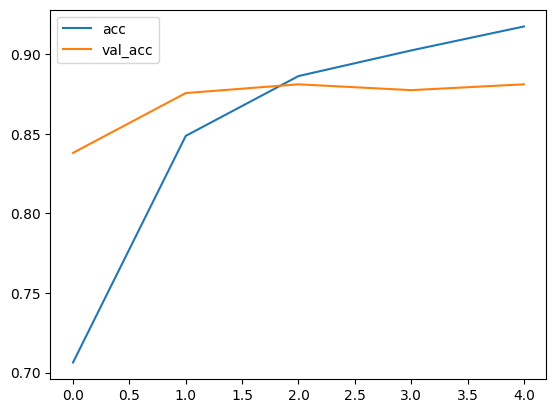

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

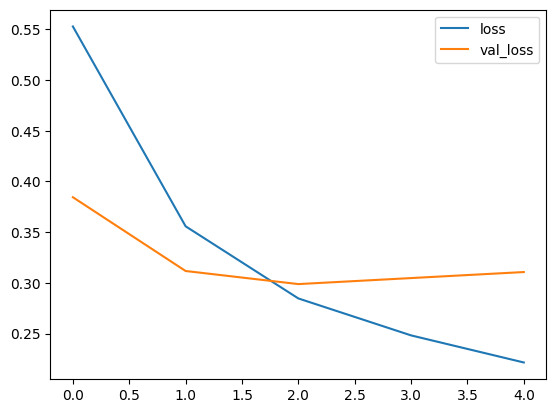

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plot.jpg")

In [ ]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])

In [ ]:
test_sentence1 = "I dont like this service."
predict_sentiment(test_sentence1)

test_sentence2 = "This is the best service"
predict_sentiment(test_sentence2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted label:  negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted label:  positive
